# DIP Assignment 4

Arghya Roy (2021115008)


imports


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Task 1

Image Segmentation Using Thresholding


### a

Load a grayscale image and implement the following thresholding methods to segment the image:

- Binary Thresholding
- Adaptive Thresholding
- Otsu’s Thresholding


In [ ]:
lenna = cv2.imread("./images/Lenna.png", cv2.IMREAD_GRAYSCALE)

_, lenna_bin = cv2.threshold(lenna, 127, 255, cv2.THRESH_BINARY)

lenna_ada = cv2.adaptiveThreshold(
    lenna, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

_, lenna_otsu = cv2.threshold(lenna, 0, 255, cv2.THRESH_OTSU)

### b

Display the original and segmented images side by side for comparison, ensuring each method is clearly labeled.


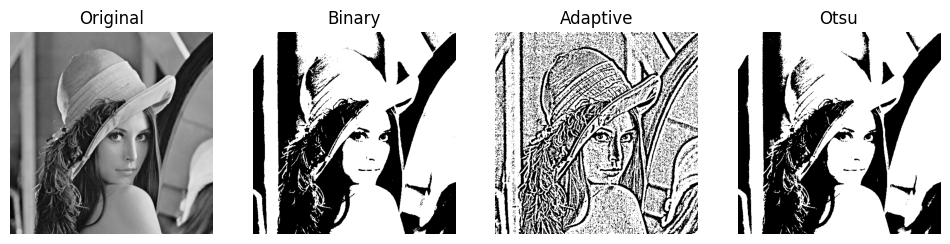

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(lenna, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(142)
plt.imshow(lenna_bin, cmap="gray")
plt.title("Binary")
plt.axis("off")

plt.subplot(143)
plt.imshow(lenna_ada, cmap="gray")
plt.title("Adaptive")
plt.axis("off")

plt.subplot(144)
plt.imshow(lenna_otsu, cmap="gray")
plt.title("Otsu")
plt.axis("off")

plt.show()

### c

In 2-3 sentences, discuss which method provided the best segmentation for your image and why. Consider factors like clarity of object boundaries and noise levels.


tbd


---


## Task 2

Line Detection Using Hough Transform


### a

Write a function to detect and highlight straight lines in an image using the Hough Line Transform. Make sure to use the Canny edge detector to preprocess the image before applying the Hough Transform.


In [ ]:
def detect_straight_lines(img, threshold):
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)

    img_copy = img.copy()

    for line in lines:
        rho, theta = line[0]

        a = np.cos(theta)
        b = np.sin(theta)

        x0 = a * rho
        y0 = b * rho

        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(img_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return img_copy

### b

Test your function on an image with clear straight lines, such as a road, building, or grid structure. Display the original image and the processed image with highlighted lines.


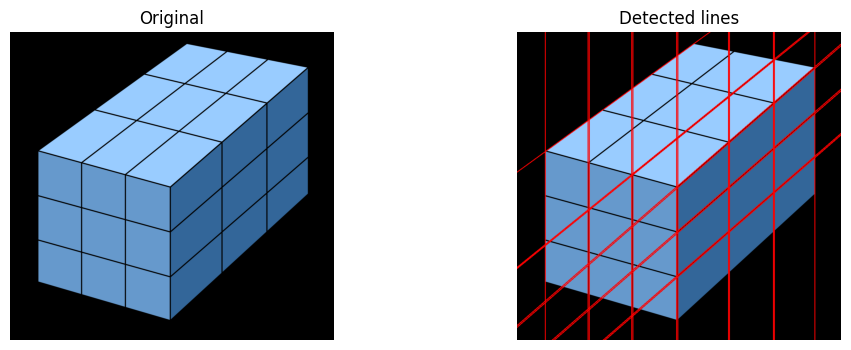

In [ ]:
grid = cv2.imread("./images/grid.png", cv2.IMREAD_COLOR)

grid_lines = detect_straight_lines(grid, 300)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(cv2.cvtColor(grid, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(grid_lines, cv2.COLOR_BGR2RGB))
plt.title("Detected lines")
plt.axis("off")

plt.show()

### c

Experiment with different threshold parameters in the Hough Transform to optimize line detection. In 2-3 sentences, describe the parameter changes and how they affected the results.


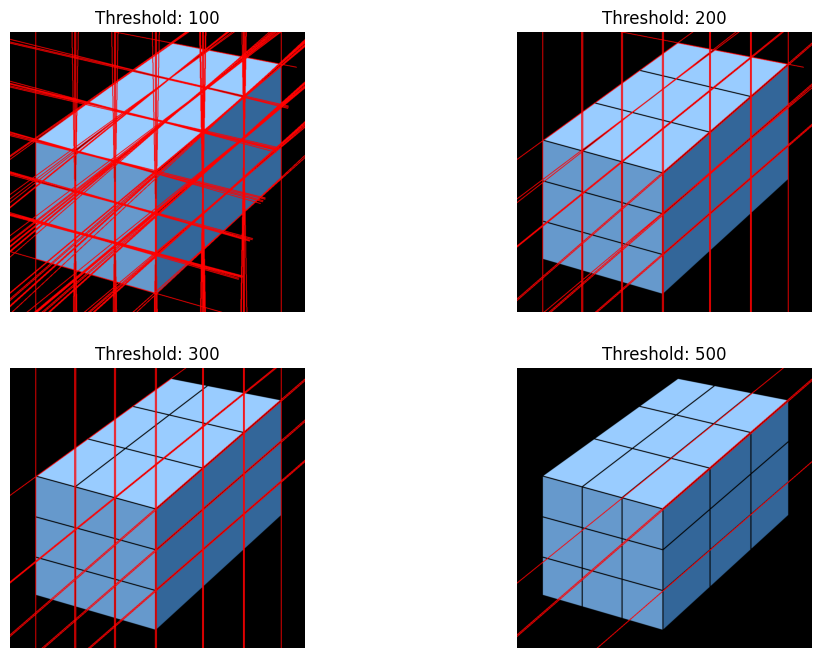

In [ ]:
thresholds = [100, 200, 300, 500]

plt.figure(figsize=(12, 8))

for i, threshold in enumerate(thresholds):
    grid_lines = detect_straight_lines(grid, threshold)

    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(grid_lines, cv2.COLOR_BGR2RGB))
    plt.title(f"Threshold: {threshold}")
    plt.axis("off")

plt.show()

explanation tbd


---


## Task 3

Circle Detection Using Hough Circle Transform


### a

Implement a function to detect circles in an image using the Hough Circle Transform. Use suitable preprocessing steps (e.g., smoothing) to improve detection accuracy


In [2]:
def detect_circles(img, dp, min_dist, param1, param2, min_radius, max_radius):

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.medianBlur(img_gray, 7)

    circles = cv2.HoughCircles(
        img_gray,
        cv2.HOUGH_GRADIENT,
        dp,
        min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius,
    )

    img_copy = img.copy()

    if circles is not None:
        circles = np.uint16(np.around(circles))

        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]

            cv2.circle(img_copy, center, radius, (0, 255, 0), 10)

    return img_copy

### b

Apply your function to an image with circular objects (e.g., coins, wheels, or round signs). Display the original image and the processed image with detected circles overlaid.

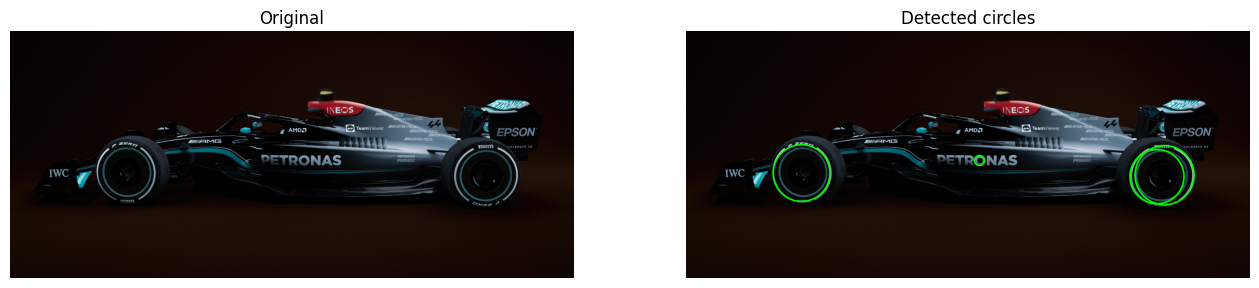

In [4]:
ham = cv2.imread("./images/merc44.jpg", cv2.IMREAD_COLOR)

ham_with_circles = detect_circles(ham, 1, 50, 100, 100, 0, 0)

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(cv2.cvtColor(ham, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(ham_with_circles, cv2.COLOR_BGR2RGB))
plt.title("Detected circles")
plt.axis("off")

plt.show()

### c

Experiment with different radius ranges and accumulator thresholds. Display the results with and without these adjustments, and briefly explain any improvements observed. 

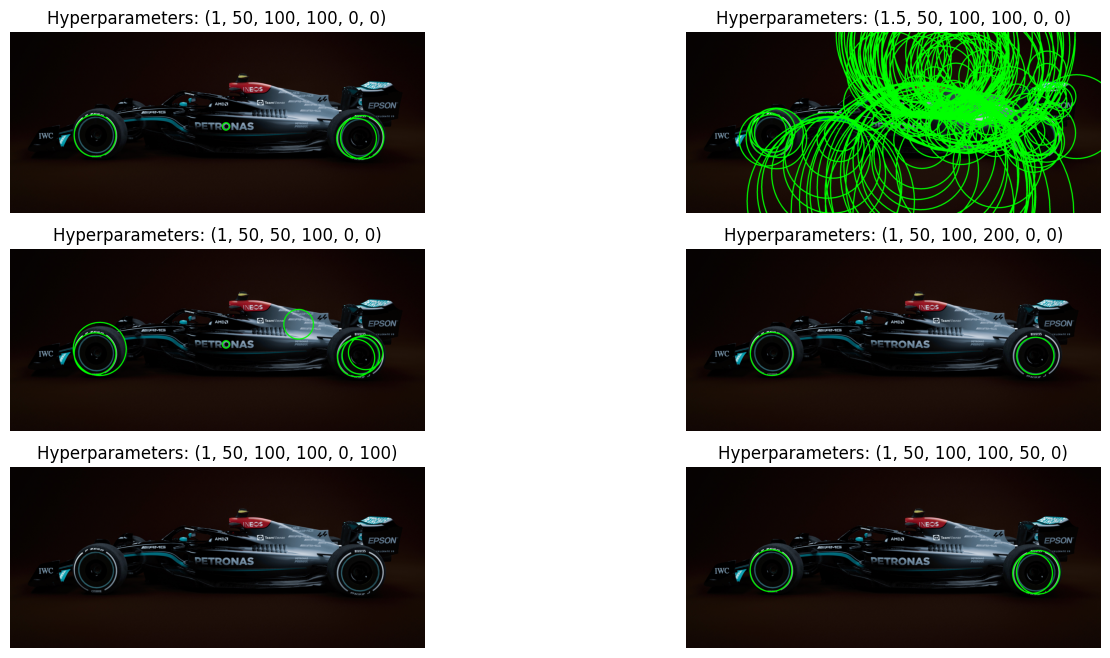

In [ ]:
hyperparameters = [
    (1, 50, 100, 100, 0, 0),
    (1.5, 50, 100, 100, 0, 0),
    (1, 50, 50, 100, 0, 0),
    (1, 50, 100, 200, 0, 0),
    (1, 50, 100, 100, 0, 100),
    (1, 50, 100, 100, 50, 0),
]

plt.figure(figsize=(16, 8))

for i, hyperparameter in enumerate(hyperparameters):
    ham_with_circles = detect_circles(ham, *hyperparameter)

    plt.subplot(3, 2, i + 1)
    plt.imshow(cv2.cvtColor(ham_with_circles, cv2.COLOR_BGR2RGB))
    plt.title(f"Hyperparameters: {hyperparameter}")
    plt.axis("off")

plt.show()

explanaion tbd

---